<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-Data" data-toc-modified-id="Generate-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate Data</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li></ul></li><li><span><a href="#Visualize-data" data-toc-modified-id="Visualize-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize data</a></span><ul class="toc-item"><li><span><a href="#Distibution-of-Variables" data-toc-modified-id="Distibution-of-Variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Distibution of Variables</a></span></li><li><span><a href="#Relationship-between-variables" data-toc-modified-id="Relationship-between-variables-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Relationship between variables</a></span></li></ul></li><li><span><a href="#5-Model" data-toc-modified-id="5-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>5 Model</a></span><ul class="toc-item"><li><span><a href="#Model-1:-Mean" data-toc-modified-id="Model-1:-Mean-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model 1: Mean</a></span></li><li><span><a href="#Model-2:-Linear-Regression" data-toc-modified-id="Model-2:-Linear-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model 2: Linear Regression</a></span></li></ul></li><li><span><a href="#5.2-Measuring-the-quality-of-fit:-errors" data-toc-modified-id="5.2-Measuring-the-quality-of-fit:-errors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>5.2 Measuring the quality of fit: errors</a></span><ul class="toc-item"><li><span><a href="#5.2.1-Sum-of-squared-errors-and-$R^2$" data-toc-modified-id="5.2.1-Sum-of-squared-errors-and-$R^2$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>5.2.1 Sum of squared errors and $R^2$</a></span></li></ul></li></ul></div>

**Applied Statistics**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [2]:
# Python set up (load modules) 
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table # confidence intervall
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set() 
from IPython.display import Image

# Application 3: Linear regression and the quality of fit

In this application we cover linear regression - the fundamental starting point for all regression methods - and how to evaluate the quality of fit of a regression model. Therefore, we quantify the extent to which the predicted outcome value for a given observation is close to the true outcome value for that observation. In the regression setting, the most commonly-used measure is the mean squared error (MSE), which we will cover in detail.

One of the simplest models we use in statistics is the **mean**. It is a (simple) model because it represents a summary of data. Therefore, we use the mean as a basline model and compare the quality of fit between the mean and a simple linear regression model with only one predictor. In our application, we use a sample of 20 adult german women from whom we obtained their height and the average height of their parents (height_parents).

Data description (n = 20, p = 5); Variables: name, unique identification number (id), height, average height of parents (height_parents), gender.

Relevant content of this application:

    5 Model
    5.1 Parameters
    5.2 Measuring the quality of fit: errors
    5.2.1 Sum of squared errors, (adjusted) R-squared
    5.2.2 Pearson's correlation coefficient
    5.2.3 Mean squared error, variance and standard deviation
    5.2.4 F-Statistic
    5.2.5 Standard error
    5.2.6 Confidence interval
    5.2.7 Confidence intervals in small samples
    5.3 Further measures for model selection
    5.3.1 Bayesian Information criterion (BIC)
    5.3.2 Akaike information criterion (AIC)

---

*Source*

*The statistical explanations in this tutorial are mainly based on Fields (2018).*

Fields, A. (2018). Discovering statistics using IBM SPSS statistics. Thousand Oaks, CA.

---

## Generate Data

In [3]:
# Instead of importing data, we will create our own data
df = pd.DataFrame({ 'name': pd.Categorical([ "Stefanie", "Petra", "Stefanie", 
                                             "Manuela", "Nadine", "Sophia",  
                                             "Ellen", "Emilia", "Lina", 
                                             "Marie", "Lena", "Mila",    
                                             "Ida", "Ella", "Pia", 
                                             "Sarah ", "Lia", "Lotta", 
                                             "Emma", "Lina"]),
                       'id': pd.Categorical(["1", "2", "3", "4", "5", "6",  
                                             "7", "8", "9", "10", "11", "12",    
                                             "13", "14", "15", "16 ", "17", "18", 
                                             "19", "20"]),
                          'height': np.array([162, 163, 163, 164, 164, 164, 164, 165, 
                                              165, 165, 165, 165, 165, 166, 166, 166,
                                              166, 167, 167, 168],dtype='int32'),
                  'height_parents': np.array([161, 163, 163, 165, 163, 164, 164, 165, 
                                              165, 165, 166, 167, 165, 166, 166, 166,
                                              166, 166, 167, 168],dtype='int32'),
                                    'gender': 'female' })

### Descriptive statistics

In [7]:
# summary statistics for all numerical columns
round(df.describe(),2)

,height,height_parents
count,20.00,20.00
mean,165.00,165.05
std,1.49,1.67
min,162.00,161.00
25%,164.00,164.00
50%,165.00,165.00
75%,166.00,166.00
max,168.00,168.00


In [8]:
# summary statistics for all categorical columns
df.describe(include=['category'])

,name,id
count,20,20
unique,18,20
top,Stefanie,9
freq,2,1


## Visualize data

### Distibution of Variables

/Users/jankirenz/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


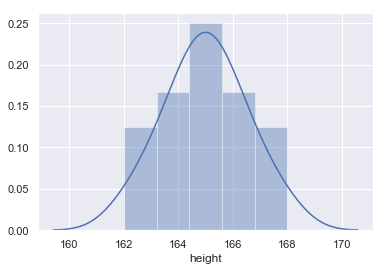

In [9]:
# histogram with seaborn
sns.distplot(df.height);

Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the **boxplot**. A boxplot is a type of visual shorthand for a distribution of values that is popular among statisticians. Each boxplot consists of:

A box that stretches from the 25th percentile of the distribution to the 75th percentile, a distance known as the interquartile range (IQR). In the middle of the box is a line that displays the median, i.e. 50th percentile, of the distribution. These three lines give you a sense of the spread of the distribution and whether or not the distribution is symmetric about the median or skewed to one side.

Visual points that display observations that fall more than 1.5 times the IQR from either edge of the box. These outlying points are unusual so are plotted individually.

A line (or whisker) that extends from each end of the box and goes to the farthest non-outlier point in the distribution.

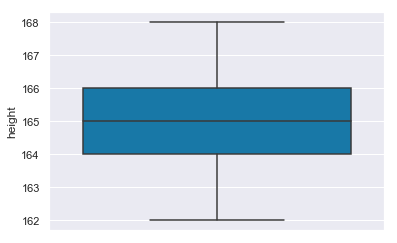

In [10]:
# boxplot 
sns.boxplot(y='height', data=df, palette='winter');

### Relationship between variables

In [1]:
# check relationship with a joint plot
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10, 10), diagonal='kde');

NameError: name 'pd' is not defined

We can observe a strong relationship between the average height of the parents and the height of their daughter. Hence, it would make sense to use the variable "height_parents" as a predictor for the outcome variable "height" in a statistical model.

## 5 Model

If we are interested in discovering something about a phenomenon in the real world, we need to collect data to test predictions from our hypotheses about that phenomenon. Testing these hypotheses involves building statistical **models** of the phenomenon of interest.

It is important that the model accurately represents the real world, otherwise any conclusions we extrapolate to the real-world will be meaningless. Hence, the statistical model should represent the data collected (the observed data) as closely as possible. 

$$Outcome_i = (Model) + error_i$$

This equation means that the data we observe can be predicted from the model we choose to fit plus some amount of error. There are different terms that basically refer to **error** like **residual**, **deviation** or **deviance**. The degree to which a statistical model represents the data collected is known as the **fit of the model** which is closely related to the error of the model.

The ‘model’ in the equation will vary depending on the design of your study, the type of data you have and what it is you’re trying to achieve with your model. Consequently, the model can also vary in its complexity.

The important thing is that we can use the model computed in our **sample** to estimate the value in the **population** (which is the value in which we’re interested).

# 5.1 Parameters

Statistical models are made up of **variables** and **parameters**. Variables are measured constructs that vary across entities in the sample. In contrast, parameters are not measured and are (usually) constants believed to represent some fundamental truth about the relations between variables in the model.

Some examples of parameters with which you already are familiar are: the **mean** and **median** (which estimate the centre of the distribution). We will also cover correlation and regression coefficients (which estimate the relationship between two variables) in other applications.

If we’re interested only in summarizing the outcome, as we are when we compute a **mean**, then we won’t have any variables in the model, only a **parameter** (typically called *b*), so we could write our $Outcome_i = (Model) + error_i$ equation as:

$Outcome_i = (b) + error_i$

---

Let's say we would like to compare the **quality of fit** of two models to predict height: the simple mean and a second model in which we use information about the average height of their parents as a predictor in a linear regression model.

**Model 1: Mean**
  * In the case of the **mean**, the *b* parameter is usually called $\bar{x}$, which leads to:

$height_i = (\bar{x}) + error_i$
  * with

$\bar{x} =  \frac {\sum_{i=1}^n x_{i}}{n}$

**Model 2: Linear Regression**
  * In our second model, we use the variable height of parents as predictor in a linear regression model:

$height_i = (b_0 + b_i \times heightparents_i ) + error_i$


### Model 1: Mean

In [12]:
# calculate the mean
df["height"].mean()

165.0

In [13]:
# add the mean (as "average") to our DataFrame
df = df.assign(average = df.height.mean())
df.head(5)

,name,id,height,height_parents,gender,average
0,Stefanie,1,162,161,female,165.0
1,Petra,2,163,163,female,165.0
2,Stefanie,3,163,163,female,165.0
3,Manuela,4,164,165,female,165.0
4,Nadine,5,164,163,female,165.0


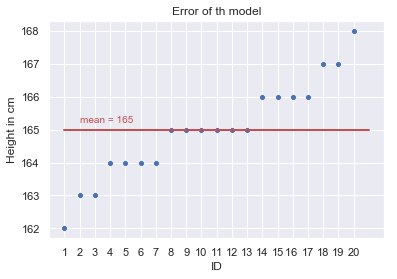

In [14]:
# create a scatterplot (plt)
plt = sns.scatterplot(x="id", y="height",data=df);
plt.set(xlabel='ID', ylabel='Height in cm', title='Error of th model');
plt.plot([0, 20], [165, 165], linewidth=2, color='r');
plt.text(1, 165.2,'mean = 165', rotation=0, color='r');

### Model 2: Linear Regression

In [15]:
# fit linear model with statsmodels.formula.api (with R-style formulas) 
lm = smf.ols(formula ='height ~ height_parents', data=df).fit()

# add the regression predictions (as "pred") to our DataFrame
df['pred'] = lm.predict()

In [16]:
df.head(5)

,name,id,height,height_parents,gender,average,pred
0,Stefanie,1,162,161,female,165.0,161.711048
1,Petra,2,163,163,female,165.0,163.335222
2,Stefanie,3,163,163,female,165.0,163.335222
3,Manuela,4,164,165,female,165.0,164.959396
4,Nadine,5,164,163,female,165.0,163.335222


In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     88.78
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.21e-08
Time:                        15:39:54   Log-Likelihood:                -17.995
No. Observations:                  20   AIC:                             39.99
Df Residuals:                      18   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.9651     14.226      2.177      0.043       1.077      60.853
height_parents     0.8121      0.086      9.422      0.000       0.631       0.993
==============================================================================
Omnibus:                        4.700   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                2.492
Skew:                          -0.684   Prob(JB):                        0.288
Kurtosis:                       4.058   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
b_0 = 30.9651
b_1 = 0.8121
X = 166
Vorhersage = b_0 + b_1*(X)
print(Vorhersage)

165.77370000000002


We use [Seaborne's lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to plot the regression line:

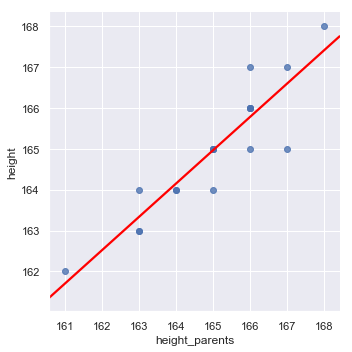

In [19]:
# Plot regression line 
sns.lmplot(x='height_parents', y='height', data=df, line_kws={'color':'red'}, height=5, ci=None, );

## 5.2 Measuring the quality of fit: errors

In order to evaluate the performance of a statistical model on a given data set, we need some way to measure how well its predictions actually match the observed data. That is, we need to quantify the extent to which the predicted response value for a given observation is close to
the true response value for that observation. 

With most statistical models we can determine whether the model represents the data well by looking at how different the scores we observed in the data are from the values that the model predicts.

$Outcome_i = (b) + error_i$, hence

$error_i = Outcome_i - (b)$

In other words, the error for a particular entity is the score predicted by the model for that entity subtracted from the corresponding observed score.


### 5.2.1 Sum of squared errors and $R^2$

Errors cancel out because some are positive and others negative. Therefore, we square each deviation. If we add these squared deviations we get the **Sum of Squared Errors (SS)**.

$ SS = \sum_{i=1}^n (outcome_i - model_i)^2$ 

Using the **mean** of the outcome as a baseline model, we can calculate the difference between the observed values and the values predicted by the mean. We square these differences to give us the sum of squared differences. This sum of squared differences is known as the **total sum of squares** (denoted by $SS_T$) and it represents how good the mean is as a model of the observed outcome scores

$SS_T = \sum_{i=1}^n (observed_i - mean)^2$

We can use the values of $SS_T$ and the sum of squared residuals ($SS_R$) 

$SS_R =  \sum_{i=1}^n (observed_i - model_i )^2$

to calculate how much better the linear model is than the baseline model of ‘no relationship’ (the mean). The improvement in prediction resulting from using the linear model rather than the mean is calculated as the difference between $SS_T$ and $SS_R$.

This difference shows us the reduction in the inaccuracy of the model resulting from fitting the regression model to the data. This improvement is the **model sum of squares**($SS_M$):

$SS_M = SS_T - SS_R$

If the value of $SS_M$ is *large*, the linear model is very different from using the mean to predict the outcome variable. This implies that the linear model has made a big improvement to predicting the outcome variable. 

If $SS_M$ is *small* then using the linear model is little better than using the mean (i.e., the model is no better than predicting from ‘no relationship’). 

A useful measure arising from these sums of squares is the proportion of improvement due to the model. This is calculated by dividing the sum of squares for the model by the total sum of squares to give a quantity called $R^2$

$$R^2 = \frac {SS_M}{SS_T}$$


with 

$SS_T =  \sum_{i=1}^n (observed_i - mean)^2$

$SS_R =  \sum_{i=1}^n (observed_i - model_i )^2$

$SS_M = SS_T - SS_R$

To express the $R^2$-value as a percentage multiply it by 100. $R^2$ represents the amount of variance in the outcome explained by the model ($SS_M$) relative to how much variation there was to explain in the first place ($SS_T$): it represents the proportion of the variation in the outcome that can be predicted from the model. Therefore, it can take any value between 0% and 100%. 

**Adjusted** $R^2$: Whereas $R^2$ tells us how much of the variance in Y overlaps with predicted values from the model in our sample, adjusted $R^2$ tells us how much variance in Y would be accounted for if the model had been derived from the **population** from which the sample was taken (takes degrees of freedom into account). Therefore, the adjusted value indicates the loss of predictive power or shrinkage. 

**As a general rule it is preferrable to use the adjusted $R^2$ instead of the simple $R^2$.**
